In [1296]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing scikit learn libraries for data *preprocessing*
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# importing scikit learn libraries for model fitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importing scikit learn libraries for *metrics* evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import datetime
pd.options.mode.chained_assignment = None

In [1297]:
WW_df = pd.read_csv('winequality-white.csv', delimiter = ';') #, header = None) # could have .json etc
RW_df = pd.read_csv('winequality-red.csv', delimiter = ';') # header = None if no columns given

In [1298]:
WW_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1299]:
#df.headers = ["sfdf", "sdf" .....]
#df.columns = headers

In [1300]:
RW_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1301]:
RW_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1302]:
WW_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Data wrangling
1) Missing Values: (?, N/A or empty cell)
Use replace:  df.replace() : change abitrary (like ?) to np.nan

numeric: replace by mean or median:

categorical: replace by: df[column].value_counts().idxmax()


drop the entry:   df.dropna(subset = [...]., axis =0/1 (rows/ columns), inplace = True ), 

fillna()

df[[column]]astype(data_type): float: 

In [1303]:
WW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [1304]:
WW_df['type'] = 'white'
RW_df['type'] = 'red'

In [1491]:
wines = pd.concat([WW_df, RW_df])
wines = wines.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [1306]:
wines.to_csv("wines.csv")

In [1492]:
wines['type'].value_counts().idxmin()

'red'

In [1493]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


In [1309]:
print(wines['quality'].unique())
wines['quality'].value_counts(sort = True, ascending = False)

[7 6 5 4 8 3 9]


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [1310]:
print(wines['type'].value_counts())
wines['type'].value_counts().idxmax() # categorical values

white    4898
red      1599
Name: type, dtype: int64


'white'

<AxesSubplot:>

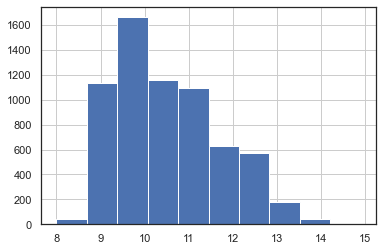

In [1311]:
wines['alcohol'].hist()

In [1354]:
# Binning

bins = [3.0, 5.0, 7.0, 9.0]
group = ['low', 'medium', 'high']
wines['quality_label'] = pd.cut(wines['quality'], bins = bins, labels = group)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low


In [1342]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_label         6467 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [1483]:
def with_hue(plot, feature, Number_of_categories,index, hue_categories):
    a = [p.get_height() for p in plot.patches]
    print(a)
    patch = [p for p in plot.patches]
    #print(patch)
    for i in range(Number_of_categories):
        total = feature.value_counts().values[index[i]]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10)
    plt.title('Wine Quality')    
    plt.xlabel('quality Label')
    plt.ylabel('Number of wines')
    plt.show()

[1620, 3078, 180, 734, 837, 18]


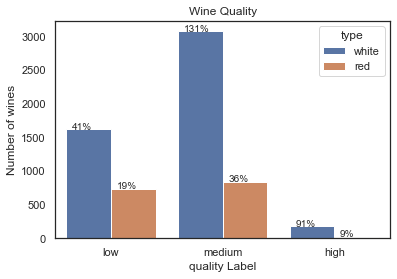

In [1343]:
ax = sns.countplot(x = 'quality_label', order = ['low', 'medium', 'high'] ,hue= 'type' , data = wines)
#ax = sns.countplot(x = 'subscription_plan', order = ['1-month', '3-months', '6-months', '12-months', 'lifetime'], hue = 'had_trial_period' , data = df_for_subscription_counts)
order_index = [0,1,2]
with_hue(ax, wines.quality_label,3, order_index,2 )

In [1314]:
wines.describe() # (include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


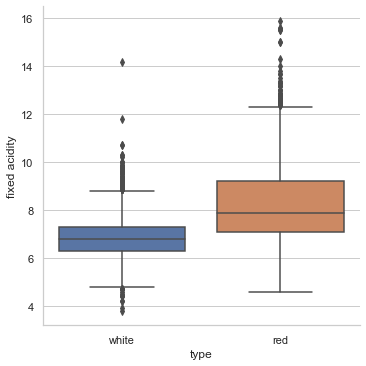

In [1262]:
sns.catplot(x = 'type' , y = 'fixed acidity', data = wines, kind = 'box' )

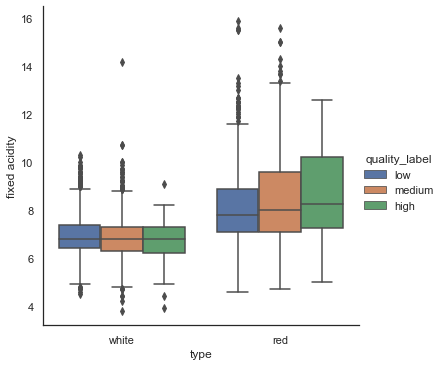

In [1344]:
sns.catplot(x = 'type' , y = 'fixed acidity', hue = 'quality_label', data = wines, kind = 'box' )

### aggregates
groupby()

In [1345]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low


In [1346]:
df_group = wines.groupby(['type', 'quality_label'], as_index = False).mean() # as_index = False (arg in grpby)

In [1347]:
df_group

,type,quality_label,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,low,8.139237,0.585484,0.238665,2.540804,0.092587,16.643052,55.050409,0.997063,3.310477,0.619196,9.926090,4.927793
1,red,medium,8.472043,0.475239,0.297921,2.535066,0.082967,15.315412,39.479092,0.996494,3.311577,0.691004,10.828375,6.237754
2,red,high,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.000000
3,white,low,6.953642,0.309981,0.334290,7.062623,0.051401,35.116667,148.326235,0.995163,3.170247,0.481593,9.843414,4.899383
4,white,medium,6.808236,0.261194,0.334480,6.082765,0.043209,35.214587,133.635802,0.993530,3.195832,0.494535,10.801966,6.285900
5,white,high,6.678333,0.277972,0.328167,5.628333,0.038011,36.627778,125.883333,0.992214,3.221167,0.485667,11.651111,8.027778


In [1348]:
nice_group = df_group.pivot(index ='type', columns = 'quality_label')
nice_group

fixed acidity                     volatile acidity            \
quality_label           low    medium      high              low    medium   
type                                                                         
red                8.139237  8.472043  8.566667         0.585484  0.475239   
white              6.953642  6.808236  6.678333         0.309981  0.261194   

                        citric acid                     residual sugar  ...  \
quality_label      high         low    medium      high            low  ...   
type                                                                    ...   
red            0.423333    0.238665  0.297921  0.391111       2.540804  ...   
white          0.277972    0.334290  0.334480  0.328167       7.062623  ...   

                     pH sulphates                       alcohol             \
quality_label      high       low    medium      high       low     medium   
type                                                                         
red            3.267222  0.619196  0.691004  0.767778  9.926090  10.828375   
white          3.221167  0.481593  0.494535  0.485667  9.843414  10.801966   

                           quality                      
quality_label       high       low    medium      high  
type                                                    
red            12.094444  4.927793  6.237754  8.000000  
white          11.651111  4.899383  6.285900  8.027778  

[2 rows x 36 columns]

#### correlation
cancer <> smoking
rain <> unbrella

#### continuous

<AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>

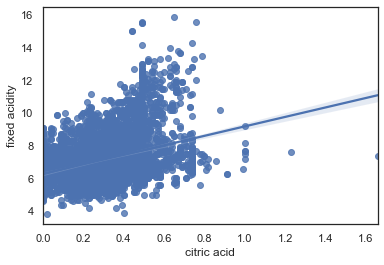

In [1320]:
sns.regplot(x = 'citric acid', y = 'fixed acidity', data= wines)

In [1321]:
pearson_coef, pval = stats.pearsonr(wines['citric acid'], wines['fixed acidity'])
print(pearson_coef, pval)

0.32443572544729826 4.185728463217734e-159


In [1322]:
pearson_coef, pval = stats.pearsonr(wines['fixed acidity'], wines['volatile acidity'])
print(pearson_coef, pval)

0.2190082563509968 2.1368086276901813e-71


Hypothesis tests: means

In [1323]:
from scipy.stats import ttest_1samp

print('Actual mean:', wines['fixed acidity'].mean())  

tstat, pval = ttest_1samp(wines['fixed acidity'].to_numpy(), 7.2)
print(tstat, pval)

Actual mean: 7.215307064799168
0.9516955157611723 0.3412868321568959


In [1324]:
from scipy.stats import ttest_ind

# tstat, pval = ttest_ind(list1, list2)


In [1325]:
# ANOVA : Analysis of variance
from scipy.stats import f_oneway

#stat, pval = f_oneway(list1, list2, list3)

#concat_values = np.concatenate([1,2,3])
#concat_labels = [label1, label2, label3]

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey_r = pairwise_tukeyhsd(concat_values, concat_labels, 0.05)





In [1326]:
# proportion
from scipy.stats import binom_test

#pval = binom_test(test_case, sample_size, null_proportion)

In [1486]:
Conditional: Normal ditribution
if Skewed: 

from scipy import stats
boxcox = stats.boxcox(df[column])[0]
f[column] = pd.Series(boxcox)


Std of samples must be equal and samples should be independent

SyntaxError: invalid syntax (<ipython-input-1486-2e628de72fe7>, line 1)

In [1328]:
wines['fixed acidity'].mean()

7.215307064799168

In [1487]:
#White Wine
corr = WW_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, 
square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

<Figure size 864x720 with 0 Axes>

In [1489]:
# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap,
square=True, annot=True,
linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

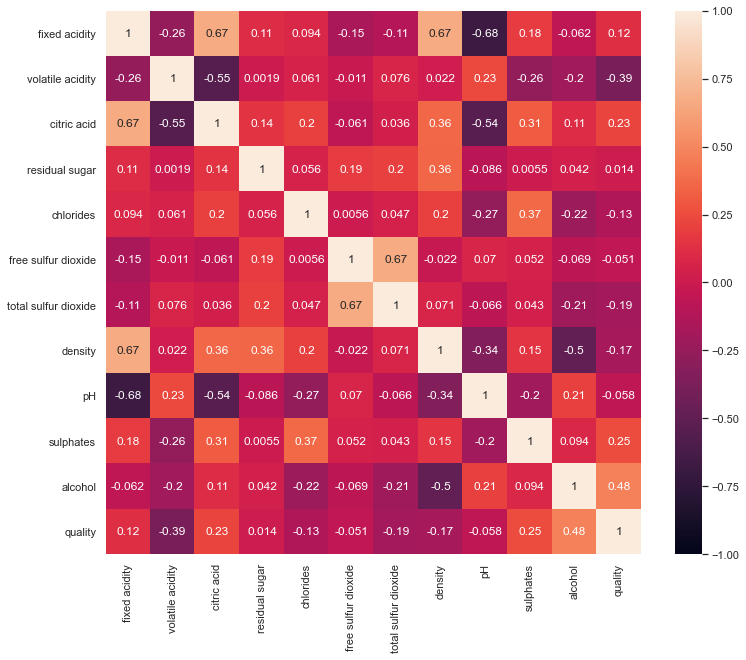

In [1485]:
#Red Wine
corr = RW_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

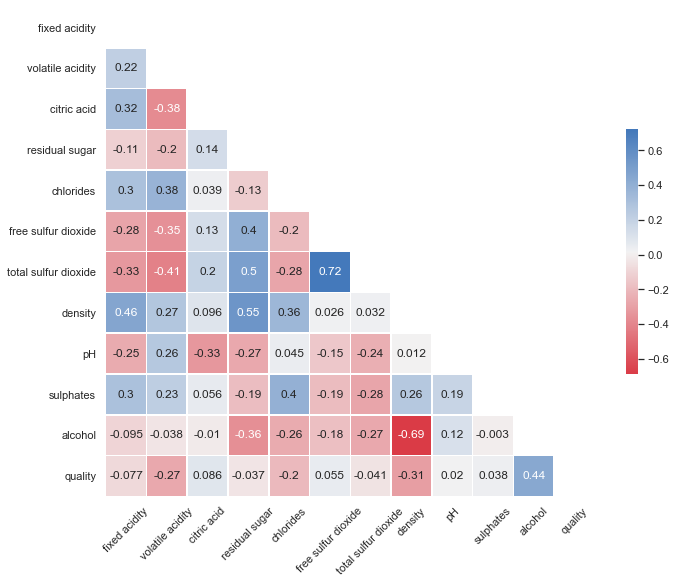

In [1490]:
#correlation - run the same code for red wine ()


wines.drop(['quality_label'], inplace=True, axis=1)
correlation_mat = wines.corr()

#sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

In [1334]:

from scipy.stats import chi2_contingency

# multiple proportions X.shape = [row_case, column_case]
# chi2, pval, dof, expected = chi2_contingency(X)


In [1380]:
# Binning

bins = [3, 5, 7, 9]
group = ['low', 'medium', 'high']
wines['quality_label'] = pd.cut(wines['quality'], bins = bins, labels = group)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low


<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

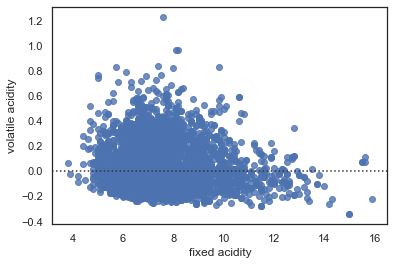

In [1351]:
sns.residplot(wines['fixed acidity'], wines['volatile acidity'])

In [1352]:
#One hot encodeing


#df = pd.get_dummies(wines['type'])
# pd.concat([wines. df], axis = 1, inplace = True)
# pd.drop("type", axis = 1, inplace = True)

In [1381]:
le = LabelEncoder()
wines['quality_label'] = le.fit_transform(wines['quality_label'])
wines['type'] = le.fit_transform(wines['type'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [1382]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low


In [1357]:
wines[wines["quality_label"]==0].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
quality_label           0
dtype: int64

In [1385]:
X = wines.drop(['quality', 'type', 'quality_label'], axis = 1)
#y = wines['type']
y = wines['quality_label']

In [1386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [1387]:
wines['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [1496]:
# for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = np.array(X_train)
scaler.fit(X)
X = scaler.transform(X)

In [1389]:
from imblearn.under_sampling import RandomUnderSampler

In [1390]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

TypeError: '<' not supported between instances of 'float' and 'str'

In [1391]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

ValueError: Input contains NaN

In [1392]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [1393]:
skf = StratifiedKFold(n_splits=5)
print(cross_val_score(clf, X_train, y=list(y_train), scoring='roc_auc', cv=skf, n_jobs=-1, verbose=1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: multiclass format is not supported

In [1394]:
#StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_traisc = StandardScaler()
sc.fit(X_train)
X_resampled = sc.transform(X_resampled)
X_test = sc.transform(X_test)

In [1250]:
#MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()


#X = np.array(X_train)
#scaler.fit(X)
#X = scaler.transform(X_train)

In [1395]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6342,7.1,0.20,0.31,6.85,0.053,32.0,211.0,0.99587,3.31,0.59,10.4
4964,6.8,0.23,0.29,12.20,0.035,38.0,236.0,0.99760,3.35,0.52,9.8
5859,6.5,0.18,0.41,14.20,0.039,47.0,129.0,0.99678,3.28,0.72,10.3
2491,6.8,0.32,0.30,1.00,0.049,22.0,113.0,0.99289,3.24,0.61,10.2
2493,5.7,0.41,0.21,1.90,0.048,30.0,112.0,0.99138,3.29,0.55,11.2
...,...,...,...,...,...,...,...,...,...,...,...
3046,6.2,0.15,0.27,1.40,0.041,51.0,117.0,0.99090,3.28,0.38,11.2
1725,8.1,0.45,0.34,8.30,0.037,33.0,216.0,0.99760,3.31,0.64,9.7
4079,7.2,0.23,0.38,14.30,0.058,55.0,194.0,0.99790,3.09,0.44,9.0
2254,9.1,0.28,0.48,1.80,0.067,26.0,46.0,0.99670,3.32,1.04,10.6


In [1396]:
rfc = RandomForestClassifier()
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
max_depth.append(None)

random_grid = {
               'max_features': max_features,
               'max_depth': max_depth}
print(random_grid)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_resampled, y_resampled)
rfc_random.best_params_
#rfc_random.score_
#rfc.fit(X_train, y_train)
#pred_rfc = rfc.predict(X_test)

{'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None]}
Fitting 4 folds for each of 18 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   12.2s finished


{'max_features': 'auto', 'max_depth': 3}

In [1398]:
pred_rfc = rfc_random.best_estimator_.predict(X_test)


In [1399]:
from sklearn.metrics import cohen_kappa_score as kappa

In [1400]:
max_depth = [int(x) for x in np.linspace(8, 14, num = 6)]
max_depth.append(None)
rf_grid = {
    'max_depth' : max_depth
}

rf_opt = GridSearchCV(estimator = rfc, param_grid = rf_grid, cv = 2, verbose=2, n_jobs = -1)
print(rf_opt)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, 14, None]}, verbose=2)


In [1401]:
#Confusion matrix random forest quality type

print(confusion_matrix(y_test, pred_rfc))
print("accuracy:" ,accuracy_score(y_test, pred_rfc))
kappa_rfc=kappa(pred_rfc, y_test)
print("Kappa:", kappa_rfc) 


TypeError: '<' not supported between instances of 'float' and 'str'

In [1402]:
print(classification_report(y_test, pred_rfc))

TypeError: '<' not supported between instances of 'float' and 'str'

In [1256]:
from sklearn.linear_model import LogisticRegression
wtp_lr = LogisticRegression()
wtp_lr.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

ValueError: Input contains NaN

In [1403]:
#Confusion matrix logistic regresion quality type

print(confusion_matrix(y_test, wtp_lr_predictions))
print("accuracy:" ,accuracy_score(y_test, wtp_lr_predictions))
kappa_lr=kappa(wtp_lr_predictions, y_test)
print("Kappa:", kappa_lr) 

TypeError: '<' not supported between instances of 'float' and 'str'

In [1376]:
from sklearn.metrics import classification_report
wtp_lr_predictions = wtp_lr.predict(X_test)
print(classification_report(y_test,wtp_lr_predictions, target_names=['0', '1',"2"]))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [1404]:
# stratifiedshufflesplit
from sklearn.model_selection import StratifiedShuffleSplit

In [1378]:
from sklearn.neighbors import KNeighborsClassifier

neigh = RandomForestClassifier()
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
y_pred = neigh.predict(X_test)

ValueError: Input contains NaN

In [1405]:
neigh.score(X_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [1406]:
#Confusion matrix kNN quality type

print(confusion_matrix(y_test, y_pred))
print("accuracy:" ,accuracy_score(y_test, y_pred))
kappa_lr=kappa(y_pred, y_test)
print("Kappa:", kappa_lr) 


TypeError: '<' not supported between instances of 'float' and 'str'

In [1407]:
print(classification_report(y_test, y_pred))

TypeError: '<' not supported between instances of 'float' and 'str'

In [1408]:
wine_sales = pd.read_csv('wine_sales_data.csv')
wine_sales

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [1409]:
wine_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [1410]:
wine_sales.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [1427]:
wine_sales.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [1428]:
wine_sales.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [1429]:
wine_sales.shape

(150930, 11)

In [1430]:
wine_sales.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [694]:
wine_sales_PVV = wine_sales[((wine_sales["country"]== "Portugal") & (wine_sales["province"]== "Vinho Verde"))]
wine_sales_PVV

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [1431]:
wine_sales_PVV.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')

In [1416]:
wine_sales_PVV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 277 to 143575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   396 non-null    int64  
 1   country      396 non-null    object 
 2   description  396 non-null    object 
 3   designation  301 non-null    object 
 4   points       396 non-null    int64  
 5   price        396 non-null    float64
 6   province     396 non-null    object 
 7   region_1     0 non-null      object 
 8   region_2     0 non-null      object 
 9   variety      396 non-null    object 
 10  winery       396 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 57.1+ KB


In [1432]:
wine_sales_PVV.shape

(396, 11)

In [1433]:
wine_sales_PVV.isnull().sum()

Unnamed: 0       0
country          0
description      0
designation     95
points           0
price            0
province         0
region_1       396
region_2       396
variety          0
winery           0
dtype: int64

In [1434]:
# find out price outliers
wine_sales_PVV.describe()

,Unnamed: 0,points,price
count,396.000000,396.000000,396.000000
mean,70480.558081,86.409091,11.434846
std,42469.897042,2.491366,4.457133
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.286111
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [1435]:
wine_sales_PVV.count()

Unnamed: 0     396
country        396
description    396
designation    301
points         396
price          396
province       396
region_1         0
region_2         0
variety        396
winery         396
dtype: int64

In [681]:
# Wines without NaN
wine_sales_PVV_Outliers = wine_sales_PVV[((wine_sales_PVV["price"]>= 1) & (wine_sales_PVV["price"]<= 45))]
wine_sales_PVV_Outliers

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [1436]:
wine_sales_PVV_Outliers.describe()

,Unnamed: 0,points,price
count,310.000000,310.000000,310.000000
mean,70685.290323,86.351613,11.400000
std,43112.375913,2.512541,4.821205
min,277.000000,80.000000,5.000000
25%,33430.500000,84.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,109878.750000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [1437]:
wine_sales_PVV['points'].value_counts().sort_index(ascending=True)

80     3
82    11
83    23
84    60
85    85
86    39
87    28
88    53
89    30
90    49
91    12
92     3
Name: points, dtype: int64

In [1438]:
wine_sales_all_by_points = wine_sales_PVV.groupby("points").mean()
wine_sales_all_by_points

,Unnamed: 0,price
points,,
80,38659.666667,8.000000
82,55707.545455,8.300000
83,65310.913043,7.500000
84,64456.600000,8.244444
85,66731.094118,9.918033
86,70691.487179,10.225806
87,70621.535714,12.714286
88,71340.094340,12.847826
89,87945.166667,13.653846


In [1439]:
wine_sales_PVV['price'] = wine_sales_PVV[wine_sales_PVV["points"]== ['price'].fillna(0)


SyntaxError: unexpected EOF while parsing (<ipython-input-1439-6411ec2ae0f0>, line 1)

In [778]:
wine_sales_PVV

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.000000,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.000000,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.000000,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,16.428571,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.000000,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.000000,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.000000,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.000000,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.000000,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [1498]:
#NaN_price = wine_sales_PVV[((wine_sales_PVV["price"].isnull()) & (wine_sales_PVV["points"]))]
#NaN_price = wine_sales_PVV[((wine_sales_PVV["price"].isnull()) & (wine_sales_PVV["points"]))].groupby["points"].sum()
NaN_price_groupby = wine_sales_PVV.groupby(by=["points"], dropna=True).count()["price"].isnull().value_counts()
NaN_price_groupby

False    12
Name: price, dtype: int64

In [1499]:
wine_sales_PVV['price'] = wine_sales_PVV.groupby(['points'], sort=False)['price'].apply(lambda x: x.fillna(x.mean()))

In [1442]:
wine_sales_PVV.describe()

,Unnamed: 0,points,price
count,396.000000,396.000000,396.000000
mean,70480.558081,86.409091,11.434846
std,42469.897042,2.491366,4.457133
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.286111
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [1503]:
q = wine_sales_PVV["price"].quantile(0.50)


In [1504]:
wine_sales_PVV[wine_sales_PVV["price"] < q]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
5800,5800,Portugal,"A richly-styled style of Vinho Verde, one that...",Las Lilas,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Barca
7444,7444,Portugal,"This wine is fresh, with plenty of acidity. It...",Hera,83,9.0,Vinho Verde,NaN,NaN,Rosé,Adega Cooperativa Ponte de Barca
7464,7464,Portugal,"Soft and soapy, this is a simple wine without ...",Escolha,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Barca
7775,7775,Portugal,"A sugar water style of Vinho Verde, all sweetn...",NaN,82,9.0,Vinho Verde,NaN,NaN,Portuguese White,Vidigal
...,...,...,...,...,...,...,...,...,...,...,...
140821,140821,Portugal,"A fresh, uncomplicated wine, made and sold in ...",Gazela,84,6.0,Vinho Verde,NaN,NaN,Portuguese White,Sogrape
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges


In [1507]:
q_low = wine_sales_PVV["price"].quantile(0.25)
q_hi  = wine_sales_PVV["price"].quantile(0.75)

df_filtered = wine_sales_PVV[(wine_sales_PVV["price"] < q_hi) & (wine_sales_PVV["price"] > q_low)]
df_filtered

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...,...,...,...,...,...,...
139675,139675,Portugal,"The perfect summer apéritif, this light, fresh...",Twin Vines,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,José Maria da Fonseca
140222,140222,Portugal,"As it should be from the year and the grape, t...",NaN,85,12.0,Vinho Verde,NaN,NaN,Alvarinho,Casa de Vila Verde
140230,140230,Portugal,"Although it is a sweeter style, this is much f...",Adamado,84,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima


In [1506]:
df_filtered.describe()

,Unnamed: 0,points,price
count,234.000000,234.000000,234.000000
mean,67038.935897,85.658120,9.932653
std,42649.509934,2.059886,1.492786
min,993.000000,80.000000,7.500000
25%,30941.250000,84.000000,9.000000
50%,64732.000000,85.000000,9.918033
75%,102263.250000,87.000000,11.000000
max,143472.000000,90.000000,12.847826


In [1508]:
prices_range=df_filtered['price'].value_counts(bins=3).sort_index(ascending=True)
prices_range

(8.294, 9.816]      45
(9.816, 11.332]     85
(11.332, 12.848]    52
Name: price, dtype: int64

In [1509]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red


In [1448]:
wines['price recommendation'] = wines.apply(lambda x: max(len(x['a']), len(x['b'])), axis=1)


KeyError: 'a'

In [1452]:
wines['price'] = wines['quality_label'].apply(lambda value: '8.294, 9.816'
if value == "low" else '9.816, 11.332'
if value == "medium" else '11.332, 12.848')

In [1453]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label,price
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium,"9.816, 11.332"
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium,"9.816, 11.332"
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium,"9.816, 11.332"
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium,"9.816, 11.332"
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low,"8.294, 9.816"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium,"9.816, 11.332"
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium,"9.816, 11.332"
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium,"9.816, 11.332"
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium,"9.816, 11.332"


In [1454]:
wines.loc[wines[:,"quality_label","price"]]

TypeError: '(slice(None, None, None), 'quality_label', 'price')' is an invalid key

In [971]:
wine_sales

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [1455]:
wine_sales['country'].value_counts(ascending=False).head(10)

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

In [1517]:
wine_sale_s = wine_sales[['country', 'price', 'variety']].copy()


In [1518]:
wine_sale_s[wine_sale_s['variety']=="Chardonnay"].groupby(by=["country"]).count().sort_values(by='variety', ascending=False).head(10)

,price,variety
country,,
US,8101,8127
France,2345,2892
Chile,744,752
Australia,667,669
Italy,450,511
Argentina,459,462
New Zealand,425,454
South Africa,274,274
Israel,70,71


In [1042]:
    saublanc = wine_sales[wine_sales.variety == 'Sauvignon Blanc']
saublanc

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
52,52,France,"This ripe, full-bodied wine has ripe green fru...",Les 7 Hommes,90,42.0,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Cherrier Frères
56,56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
77,77,US,"Given four months in concrete egg, this is an ...",Juliana Vineyard,91,38.0,California,Napa Valley,Napa,Sauvignon Blanc,B Cellars
114,114,South Africa,Muted aromas of tart gooseberry and lime peel ...,Circumstance,86,20.0,Stellenbosch,NaN,NaN,Sauvignon Blanc,Waterkloof
...,...,...,...,...,...,...,...,...,...,...,...
150815,150815,Chile,Partial barrel-fermentation shows in this wine...,Terrunyo,88,29.0,Casablanca Valley,NaN,NaN,Sauvignon Blanc,Concha y Toro
150830,150830,Chile,"A refreshing wine, with nicely ripened fruit a...",La Escultura,87,10.0,Casablanca Valley,NaN,NaN,Sauvignon Blanc,Errazuriz
150838,150838,Chile,"Slightly fat, figgy aromas, with notes of thym...",NaN,86,9.0,Rapel Valley,NaN,NaN,Sauvignon Blanc,Lapostolle
150850,150850,Chile,Bright grapefruit and gooseberry aromas flesh ...,Santa Digna,85,12.0,Curicó Valley,NaN,NaN,Sauvignon Blanc,Miguel Torres


In [1459]:
saublanc10 = saublanc[saublanc.country.isin(['US','New Zealand','France','Chile','South Africa'])]
saublanc10

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
52,52,France,"This ripe, full-bodied wine has ripe green fru...",Les 7 Hommes,90,42.0,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Cherrier Frères
56,56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
77,77,US,"Given four months in concrete egg, this is an ...",Juliana Vineyard,91,38.0,California,Napa Valley,Napa,Sauvignon Blanc,B Cellars
114,114,South Africa,Muted aromas of tart gooseberry and lime peel ...,Circumstance,86,20.0,Stellenbosch,NaN,NaN,Sauvignon Blanc,Waterkloof
...,...,...,...,...,...,...,...,...,...,...,...
150815,150815,Chile,Partial barrel-fermentation shows in this wine...,Terrunyo,88,29.0,Casablanca Valley,NaN,NaN,Sauvignon Blanc,Concha y Toro
150830,150830,Chile,"A refreshing wine, with nicely ripened fruit a...",La Escultura,87,10.0,Casablanca Valley,NaN,NaN,Sauvignon Blanc,Errazuriz
150838,150838,Chile,"Slightly fat, figgy aromas, with notes of thym...",NaN,86,9.0,Rapel Valley,NaN,NaN,Sauvignon Blanc,Lapostolle
150850,150850,Chile,Bright grapefruit and gooseberry aromas flesh ...,Santa Digna,85,12.0,Curicó Valley,NaN,NaN,Sauvignon Blanc,Miguel Torres


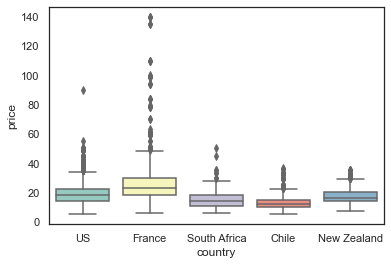

In [1460]:
ax = sns.boxplot(x="country", y="price", 
                 data=saublanc10, palette="Set3")

In [1461]:
ax = sns.boxplot(x="country"==, y="price", 
                 data=saublanc10_filtered, order=['US','New Zealand','France','Chile','South Africa'], palette="Set3")

SyntaxError: invalid syntax (<ipython-input-1461-d92909caff20>, line 1)

In [1462]:
q_low = saublanc10["price"].quantile(0.10)
q_hi  = saublanc10["price"].quantile(0.75)

saublanc10_filtered = saublanc10[(saublanc10["price"] < q_hi) & (saublanc10["price"] > q_low)]
saublanc10_filtered.describe()

,Unnamed: 0,points,price
count,3464.000000,3464.000000,3464.000000
mean,82022.770497,86.609988,15.798210
std,43063.448809,2.377710,2.856767
min,114.000000,80.000000,11.000000
25%,48262.500000,85.000000,13.000000
50%,82404.500000,87.000000,15.000000
75%,119026.000000,88.000000,18.000000
max,150850.000000,94.000000,21.000000


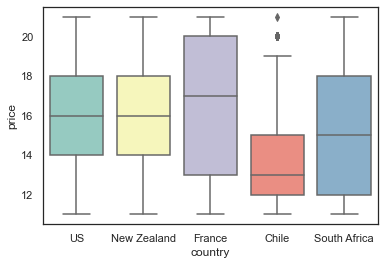

In [1463]:
#plot
ax = sns.boxplot(x="country", y="price", data=saublanc10_filtered,
                 order=['US','New Zealand','France','Chile','South Africa'], palette="Set3")

In [1071]:
#White Blend
wine_sales[wine_sales.variety == 'White Blend']


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
108,108,US,"This wine is dry and substantial, emphasizing ...",NaN,86,13.0,California,California,California Other,White Blend,Kitchen Sink
129,129,Italy,"Scents of Spanish broom, pineapple, orchard fr...",Chianta Bianco,90,45.0,Sicily & Sardinia,Etna,NaN,White Blend,Biondi
151,151,Greece,"This wine is a conversation starter, with its ...",Kapnias,89,24.0,Atalanti Valley,NaN,NaN,White Blend,Hatzimichalis
374,374,Italy,"Enticing scents of spring flower, beeswax and ...",Adenzia,90,NaN,Sicily & Sardinia,Sicilia,NaN,White Blend,Baglio del Cristo di Campobello
375,375,Italy,Made with 60% Moscato di Alessandria and 40% A...,SP68 Bianco,90,NaN,Sicily & Sardinia,Terre Siciliane,NaN,White Blend,Occhipinti
...,...,...,...,...,...,...,...,...,...,...,...
150760,150760,France,A white this age should be fresh and crisp; th...,NaN,80,8.0,Southwest France,Bergerac,NaN,White Blend,Seigneurs de Bergerac
150766,150766,US,"Ripe hay, vanilla, and apricot mark the nose; ...",NaN,93,75.0,California,Napa Valley,Napa,White Blend,Dolce
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio


In [1464]:
white_blend_wine = wine_sales[wine_sales.variety == 'White Blend']
white_blend_wine['country'].value_counts(ascending=False)

Italy           989
US              665
Spain           367
France          265
Greece          133
Austria          92
South Africa     67
Argentina        49
Australia        49
Chile            44
Israel           15
Lebanon          13
Germany          11
Slovenia         10
Portugal          9
Romania           7
Hungary           6
Croatia           6
Georgia           5
Mexico            5
Moldova           4
Canada            3
Cyprus            2
New Zealand       2
Morocco           2
Bulgaria          1
Switzerland       1
China             1
Tunisia           1
Name: country, dtype: int64

In [1465]:
white_blend_wine5 = white_blend_wine[white_blend_wine.country.isin(['Italy','US','Spain','France','Greece'])]
white_blend_wine5.describe()

,Unnamed: 0,points,price
count,2419.000000,2419.000000,2182.000000
mean,73661.424969,87.042166,22.446838
std,43955.480955,2.777502,18.912687
min,108.000000,80.000000,5.000000
25%,34109.000000,85.000000,13.000000
50%,72657.000000,87.000000,17.000000
75%,111917.000000,89.000000,25.000000
max,150927.000000,97.000000,375.000000


In [1466]:
q_low = white_blend_wine5["price"].quantile(0.10)
q_hi  = white_blend_wine5["price"].quantile(0.75)

white_blend_wine5_filtered = white_blend_wine5[(white_blend_wine5["price"] < q_hi) & (white_blend_wine5["price"] > q_low)]
white_blend_wine5_filtered.describe()

,Unnamed: 0,points,price
count,1254.000000,1254.000000,1254.000000
mean,73697.469697,86.570973,16.413078
std,44067.104947,2.265883,3.606771
min,108.000000,80.000000,11.000000
25%,35148.250000,85.000000,13.000000
50%,72486.000000,87.000000,16.000000
75%,111655.500000,88.000000,19.000000
max,150927.000000,93.000000,24.000000


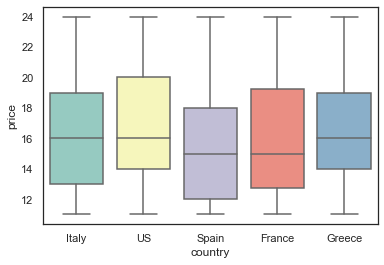

In [1467]:
#plot

ax = sns.boxplot(x="country", y="price", data=white_blend_wine5_filtered,
                 order=['Italy','US','Spain','France','Greece'], palette="Set3")




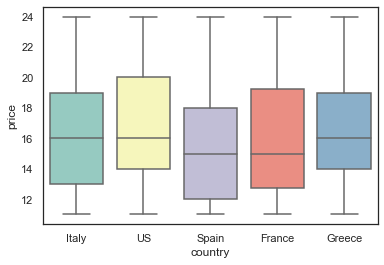

In [1468]:
ax = sns.boxplot(x="country", y="price", data=white_blend_wine5_filtered,
                 order=['Italy','US','Spain','France','Greece'], palette="Set3")

In [1469]:
df.plot.pie(subplots=True, figsize=(11, 6))

NameError: name 'df' is not defined

In [1470]:
port_wine = wine_sales[wine_sales.province == 'Port']
port_wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1340,1340,Portugal,"From one of the great names of Port, this LBV ...",Late Bottled Vintage,88,20.0,Port,NaN,NaN,Port,Delaforce
2683,2683,Portugal,"While 2013 was not a great Port year, it produ...",Vintage,90,65.0,Port,NaN,NaN,Port,Poças
6312,6312,Portugal,Vargellas is always associated with violet aro...,Quinta de Vargellas Vintage,94,53.0,Port,NaN,NaN,Port,Taylor Fladgate
6933,6933,Portugal,"Wonderfully floral, this wine is rich while al...",Quinta de Roêda Vintage,93,48.0,Port,NaN,NaN,Port,Croft
7434,7434,Portugal,"With attractive nutty aromas and ripe fruits, ...",Pátria 10 Years Old,87,30.0,Port,NaN,NaN,Port,Messias
...,...,...,...,...,...,...,...,...,...,...,...
149610,149610,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,NaN,Port,NaN,NaN,Port,Ferreira
149619,149619,Portugal,This is more like an Italian bitters than a Po...,30-year old tawny,84,60.0,Port,NaN,NaN,Port,Messias
149624,149624,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,NaN,Port,C. da Silva
149631,149631,Portugal,"This is a very old 40-year old, with some hars...",40-year old tawny,84,130.0,Port,NaN,NaN,Port,Poças


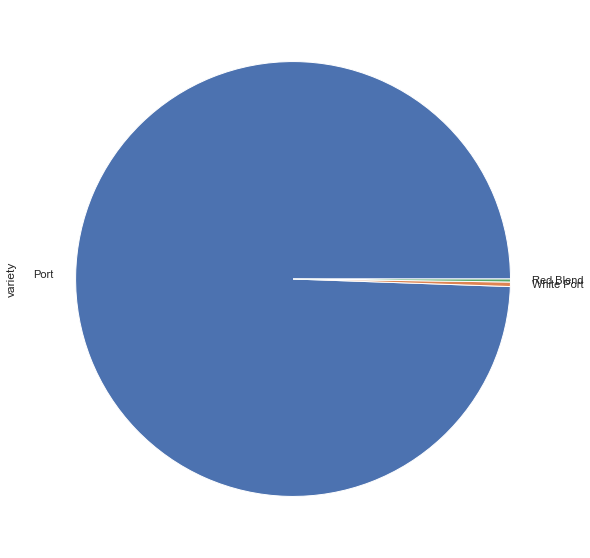

In [1472]:
pieport.plot.pie(subplots=True, figsize=(20, 10));

In [1473]:
pieport=port_wine['variety'].value_counts(ascending=False)
pieport

Port          898
White Port      3
Red Blend       2
Name: variety, dtype: int64

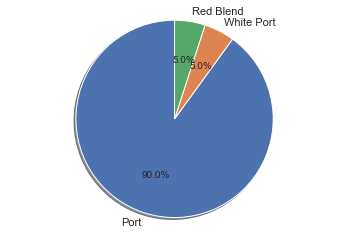

In [1474]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Port', 'White Port', 'Red Blend'
sizes = [90, 5, 5]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [1475]:
winevariety15 = wine_sales['variety'].value_counts(ascending=False).head(15)
winevariety15

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Sangiovese                   3345
Malbec                       3208
White Blend                  2824
Rosé                         2817
Tempranillo                  2556
Name: variety, dtype: int64

In [1142]:
winevariety20df=  winevariety20.to_frame()
winevariety20df

,variety
Chardonnay,14482
Pinot Noir,14291
Cabernet Sauvignon,12800
Red Blend,10062
Bordeaux-style Red Blend,7347
Sauvignon Blanc,6320
Syrah,5825
Riesling,5524
Merlot,5070
Zinfandel,3799


In [1476]:
varieties_new = wine_sales[wine_sales.variety.isin(['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Sauvignon Blanc','Syrah','Riesling','Merlot','Zinfandel','Sangiovese','Malbec','White Blend','Rosé','Tempranillo'])]
varieties_new

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...,...
150911,150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros
150912,150912,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio


In [1477]:

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="variety", y="Unnamed: 0=", data=varieties_new)

ValueError: Could not interpret input 'Unnamed: 0='

In [1478]:
portuguese_white = wine_sales[wine_sales.variety == 'Portuguese White']
port_white_province=portuguese_white['province'].value_counts(ascending=False)
port_white_province

Vinho Verde              240
Douro                    182
Alentejano               159
Tejo                      93
Lisboa                    65
Dão                       47
Península de Setúbal      30
Alentejo                  26
Bairrada                  23
Minho                     14
Beiras                    12
Estremadura                9
Ribatejo                   8
Setubal                    8
Duriense                   4
Terras do Sado             4
Portuguese Table Wine      3
Beira Interior             3
Ribatejano                 3
Trás-os-Montes             3
Alenteo                    2
Transmontano               1
Palmela                    1
Bucelas                    1
Name: province, dtype: int64

In [1290]:
port_white_province.to_frame()

,province
Vinho Verde,240
Douro,182
Alentejano,159
Tejo,93
Lisboa,65
Dão,47
Península de Setúbal,30
Alentejo,26
Bairrada,23
Minho,14


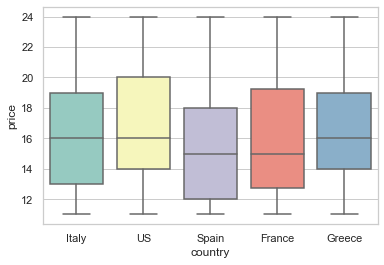

In [1480]:

ax = sns.boxplot(x="country", y="price", data=white_blend_wine5_filtered,
                 order=['Italy','US','Spain','France','Greece'], palette="Set3")


In [1481]:
portuguese_whitep = port_white_province[port_white_province.country.isin(['Vinho Verde','Douro','Alentejano','Tejo','Lisboa'])]


AttributeError: 'Series' object has no attribute 'country'

In [1482]:
ax = sns.barplot(x="day", y="total_bill",  data=port_white_province)

ValueError: Could not interpret input 'day'